<span style="font-family: Arial; font-weight:bold;font-size:2.1em;color:#fff;">-----------------------------------
    
<span style="font-family: Arial; font-weight:bold;font-size:2.1em;color:#fa9200;">Testing out Indicators across various Stocks to Validate
    
<span style="font-family: Arial; font-weight:bold;font-size:2.1em;color:#fff;">-----------------------------------

# Import Packages

In [124]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from datetime import date, datetime
import os
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.formula.api as sm
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import yfinance as yf
from scipy.signal import argrelextrema
from collections import defaultdict
import sqlite3
import warnings
warnings.filterwarnings("ignore")
import Indicators
import Measurement

# Grab Data for Ticker

In [183]:
tickers = Indicators.save_sp500_tickers()
ticker = tickers[0]
ticker = 'PBR'
ticker = 'AAL'
events = ['ihs_event','hs_event','fw_event','rw_event']
df = Indicators.get_ticker(ticker,500)
df

datetime       open       high        low      close  \
0    2022-03-28 09:30:00-04:00  17.270000  17.379999  17.030001  17.197800   
1    2022-03-28 10:30:00-04:00  17.195000  17.240000  16.969999  16.985001   
2    2022-03-28 11:30:00-04:00  16.980000  17.000000  16.820000  16.870001   
3    2022-03-28 12:30:00-04:00  16.870001  17.070000  16.830000  17.045000   
4    2022-03-28 13:30:00-04:00  17.049999  17.084999  16.969999  17.030001   
...                        ...        ...        ...        ...        ...   
3484 2024-03-22 09:30:00-04:00  14.710000  14.775000  14.645000  14.673400   
3485 2024-03-22 10:30:00-04:00  14.675000  14.770000  14.650000  14.760000   
3486 2024-03-22 11:30:00-04:00  14.760000  14.800000  14.730000  14.765000   
3487 2024-03-22 12:30:00-04:00  14.765000  14.776000  14.700000  14.750000   
3488 2024-03-22 13:30:00-04:00  14.745000  14.810000  14.740000  14.770000   

       volume  dividends  stock splits                date ticker  
0     8640483        0.0           0.0 2022-03-28 09:30:00    AAL  
1     3925334        0.0           0.0 2022-03-28 10:30:00    AAL  
2     3403048        0.0           0.0 2022-03-28 11:30:00    AAL  
3     2520476        0.0           0.0 2022-03-28 12:30:00    AAL  
4     1486180        0.0           0.0 2022-03-28 13:30:00    AAL  
...       ...        ...           ...                 ...    ...  
3484  2314042        0.0           0.0 2024-03-22 09:30:00    AAL  
3485  2058927        0.0           0.0 2024-03-22 10:30:00    AAL  
3486  1554933        0.0           0.0 2024-03-22 11:30:00    AAL  
3487  1541568        0.0           0.0 2024-03-22 12:30:00    AAL  
3488  1145664        0.0           0.0 2024-03-22 13:30:00    AAL  

[3489 rows x 10 columns]

# Add SMA, Min/Max, Events

In [137]:
SMAs = [5,30,60,90]
smoothing = 10
window = 15

df = Indicators.get_sma(df,SMAs)
minmax = Indicators.get_max_min(df, smoothing, window)
invhs = Indicators.find_IHS(minmax).reset_index(drop=True)
rw = Indicators.find_RW(minmax,.03).reset_index(drop=True)
fw = Indicators.find_FW(minmax,.03).reset_index(drop=True)
df

datetime       open       high        low      close  \
3486  2022-03-28 09:30:00-04:00  17.270000  17.379999  17.030001  17.197800   
3487  2022-03-28 10:30:00-04:00  17.195000  17.240000  16.969999  16.985001   
3488  2022-03-28 11:30:00-04:00  16.980000  17.000000  16.820000  16.870001   
3489  2022-03-28 12:30:00-04:00  16.870001  17.070000  16.830000  17.045000   
3490  2022-03-28 13:30:00-04:00  17.049999  17.084999  16.969999  17.030001   
...                         ...        ...        ...        ...        ...   
6992  2024-03-21 13:30:00-04:00  14.660000  14.760000  14.660000  14.760000   
6993  2024-03-21 14:30:00-04:00  14.755000  14.810000  14.712300  14.765000   
6994  2024-03-21 15:30:00-04:00  14.765000  14.790000  14.734000  14.770000   
6995  2024-03-22 09:30:00-04:00  14.710000  14.775000  14.645000  14.673400   
6996  2024-03-22 10:30:00-04:00  14.675000  14.769800  14.650000  14.769800   

       volume  dividends  stock splits                 date ticker  ...  \
3486  8640483        0.0           0.0  2022-03-28 09:30:00    AAL  ...   
3487  3925334        0.0           0.0  2022-03-28 10:30:00    AAL  ...   
3488  3403048        0.0           0.0  2022-03-28 11:30:00    AAL  ...   
3489  2520476        0.0           0.0  2022-03-28 12:30:00    AAL  ...   
3490  1486180        0.0           0.0  2022-03-28 13:30:00    AAL  ...   
...       ...        ...           ...                  ...    ...  ...   
6992  2320211        0.0           0.0  2024-03-21 13:30:00    AAL  ...   
6993  2967202        0.0           0.0  2024-03-21 14:30:00    AAL  ...   
6994  4309969        0.0           0.0  2024-03-21 15:30:00    AAL  ...   
6995  2314042        0.0           0.0  2024-03-22 09:30:00    AAL  ...   
6996  1716581        0.0           0.0  2024-03-22 10:30:00    AAL  ...   

      rw_event  ihs_event  hs_event  upper_max  lower_min  upper_chng  \
3486         0          0         0        NaN        NaN         NaN   
3487         0          0         0        NaN        NaN         NaN   
3488         0          0         0        NaN        NaN         NaN   
3489         0          0         0        NaN        NaN         NaN   
3490         0          0         0        NaN        NaN         NaN   
...        ...        ...       ...        ...        ...         ...   
6992         0          0         0     14.805       13.9    0.047093   
6993         0          0         0     14.810       13.9    0.046394   
6994         0          0         0     14.810       13.9    0.059242   
6995         0          0         0     14.810       13.9    0.058950   
6996         0          0         0     14.810       13.9    0.057455   

      lower_chng  ihs_event_ranges            ihs_event_start  \
3486         NaN                 1  2022-03-28 09:30:00-04:00   
3487         NaN                 1  2022-03-28 09:30:00-04:00   
3488         NaN                 1  2022-03-28 09:30:00-04:00   
3489         NaN                 1  2022-03-28 09:30:00-04:00   
3490         NaN                 1  2022-03-28 09:30:00-04:00   
...          ...               ...                        ...   
6992   -0.014221                 9  2023-04-11 11:30:00-04:00   
6993   -0.015239                 9  2023-04-11 11:30:00-04:00   
6994   -0.002370                 9  2023-04-11 11:30:00-04:00   
6995   -0.003067                 9  2023-04-11 11:30:00-04:00   
6996   -0.004157                 9  2023-04-11 11:30:00-04:00   

                  ihs_event_end  
3486  2022-04-26 15:30:00-04:00  
3487  2022-04-26 15:30:00-04:00  
3488  2022-04-26 15:30:00-04:00  
3489  2022-04-26 15:30:00-04:00  
3490  2022-04-26 15:30:00-04:00  
...                         ...  
6992  2024-03-22 10:30:00-04:00  
6993  2024-03-22 10:30:00-04:00  
6994  2024-03-22 10:30:00-04:00  
6995  2024-03-22 10:30:00-04:00  
6996  2024-03-22 10:30:00-04:00  

[3511 rows x 25 columns]

# Loop Thru Tickers to find FW

In [136]:
i = 0
fw = pd.DataFrame()
while len(rw)<1 and i<500:
    ticker = tickers[i]
    df = Indicators.get_ticker(ticker,500)
    df = Indicators.get_sma(df,SMAs)
    minmax = Indicators.get_max_min(df, smoothing, window)
    invhs = Indicators.find_IHS(minmax).reset_index(drop=True)
    hs = Indicators.find_HS(minmax).reset_index(drop=True)
    fw = Indicators.find_FW(minmax,.03).reset_index(drop=True)
    rw = Indicators.find_RW(minmax,.03).reset_index(drop=True)
    i += 1
fw

Empty DataFrame
Columns: []
Index: []

# Plot Data

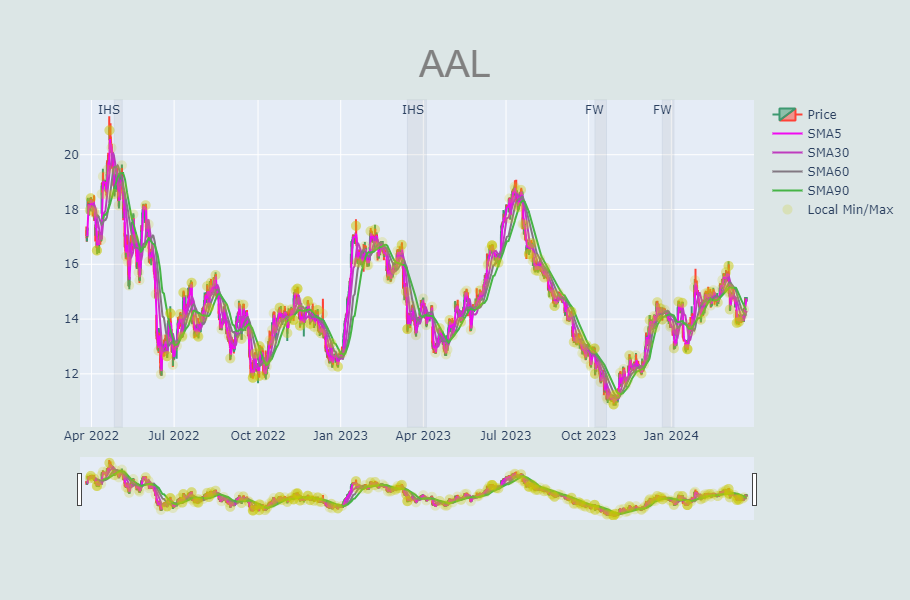

In [138]:
fig = go.Figure()
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'],
                name='Price')])
for n in SMAs:
    rgb = 'rgb({},{},{})'.format(250-n*2,n*2,250-n*2)
    fig.add_trace(go.Scatter(x=df['date'],
                y=df['SMA{}'.format(n)],
                mode='lines',
                name='SMA{}'.format(n),
                line=dict(color=rgb)))
fig.add_trace(go.Scatter(x=minmax['date'],
                y=minmax['close'],
                mode='markers',
                name='Local Min/Max',
                marker=dict(color='rgb(200,200,0)',
                            size=10,
                            opacity=0.2)
                        ))
# iterate through the shaded regions dataframe

for index, row in invhs.iterrows():
    
    # retrieve the dates
    start = row['start_event']
    end = row['end_event']

    # add shaded region
    fig.add_vrect(
            x0=start,
            x1=end,
            fillcolor="grey",
            opacity=0.1,
            line_width=1,
            annotation_text='IHS'
        )   
# iterate through the shaded regions dataframe
for index, row in fw.iterrows():
    
    # retrieve the dates
    start = row['start_event']
    end = row['end_event']

    # add shaded region
    fig.add_vrect(
            x0=start,
            x1=end,
            fillcolor="grey",
            opacity=0.1,
            line_width=1,
            annotation_text='FW'
        )  
for index, row in rw.iterrows():
    
    # retrieve the dates
    start = row['start_event']
    end = row['end_event']

    # add shaded region
    fig.add_vrect(
            x0=start,
            x1=end,
            fillcolor="grey",
            opacity=0.1,
            line_width=1,
            annotation_text='RW'
        )  
fig.update_xaxes(
        rangeslider_visible=True,
        rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            #dict(values=["2024-12-25", "2024-01-01","2024-01-15","2024-02-19"])  # hide holidays (Christmas and New Year's, etc)
        ]
    )
fig.update_layout(title={'text':ticker, 'xanchor':'center', 'yanchor':'top','x':0.5},
                height=600,
                title_font={"family":"arial","color":"gray","size":38},
                paper_bgcolor='rgb(220,230,230)'
                 )
fig.show()

# Testing out Toggle for Indicators

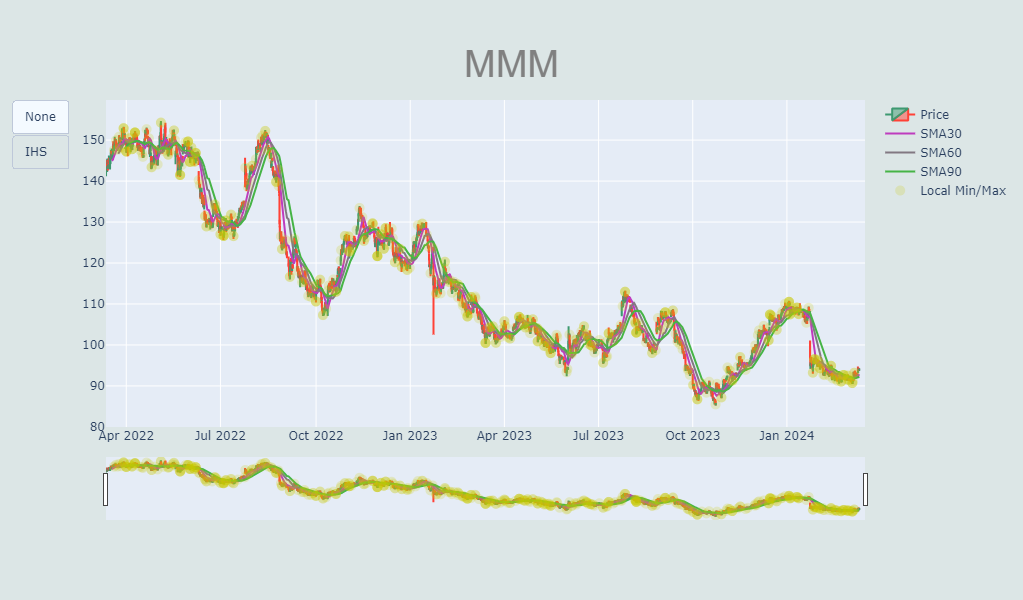

In [14]:
fig = go.Figure()
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'],
                name='Price')])
for n in SMAs:
    rgb = 'rgb({},{},{})'.format(250-n*2,n*2,250-n*2)
    fig.add_trace(go.Scatter(x=df['date'],
                y=df['SMA{}'.format(n)],
                mode='lines',
                name='SMA{}'.format(n),
                line=dict(color=rgb)))
fig.add_trace(go.Scatter(x=minmax['date'],
                y=minmax['close'],
                mode='markers',
                name='Local Min/Max',
                marker=dict(color='rgb(200,200,0)',
                            size=10,
                            opacity=0.2)
                        ))
# iterate through the shaded regions dataframe

hs_dict = {}
for index, row in invhs.iterrows():
    
    # retrieve the dates
    start = row['start_event']
    end = row['end_event']

    # add shaded region
    hs = [dict(type="vrect",
            x0=start,
            x1=end,
            fillcolor="grey",
            opacity=0.1,
            line_width=1,
            annotation_text='IHS'
        )]
    hs_dict[index]=hs
    
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=[
                dict(label="None",
                     method="relayout",
                     args=["shapes", []]),
                dict(label="IHS",
                     method="relayout",
                     args=["shapes", hs_dict[0]])
            ],
        )
    ]
)
fig.update_xaxes(
        rangeslider_visible=True,
        rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            #dict(values=["2024-12-25", "2024-01-01","2024-01-15","2024-02-19"])  # hide holidays (Christmas and New Year's, etc)
        ]
    )
fig.update_layout(title={'text':ticker, 'xanchor':'center', 'yanchor':'top','x':0.5},
                height=600,
                title_font={"family":"arial","color":"gray","size":38},
                paper_bgcolor='rgb(220,230,230)'
                 )
fig.show()

# Zoom in on Specific Event

In [45]:
df2 = Indicators.main(ticker,500,SMAs,smoothing,window)

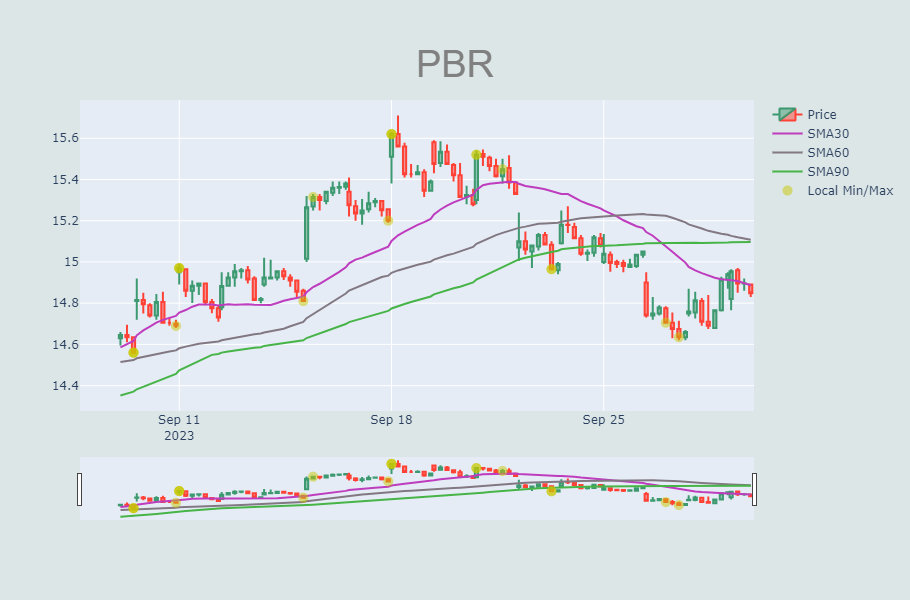

In [46]:
eventType = 'rw_event'
ID = list(df2[df2.date==df2[df2[eventType]==1].date.min()].index)[0]
chartdf = df2.iloc[ID-10:ID+95].copy()
minmax2 = minmax[(minmax.date>=chartdf.date.min())&(minmax.date<=chartdf.date.max())].copy()
fig = go.Figure()
fig = go.Figure(data=[go.Candlestick(x=chartdf['date'],
                open=chartdf['open'],
                high=chartdf['high'],
                low=chartdf['low'],
                close=chartdf['close'],
                name='Price')])
for n in SMAs:
    rgb = 'rgb({},{},{})'.format(250-n*2,n*2,250-n*2)
    fig.add_trace(go.Scatter(x=chartdf['date'],
                y=chartdf['SMA{}'.format(n)],
                mode='lines',
                name='SMA{}'.format(n),
                line=dict(color=rgb)))
fig.add_trace(go.Scatter(x=minmax2['date'],
                y=minmax2['close'],
                mode='markers',
                name='Local Min/Max',
                marker=dict(color='rgb(200,200,0)',
                            size=10,
                            opacity=0.5)
                        ))
fig.update_xaxes(
        rangeslider_visible=True,
        rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            #dict(values=["2024-12-25", "2024-01-01","2024-01-15","2024-02-19"])  # hide holidays (Christmas and New Year's, etc)
        ]
    )
fig.update_layout(title={'text':ticker, 'xanchor':'center', 'yanchor':'top','x':0.5},
                height=600,
                title_font={"family":"arial","color":"gray","size":38},
                paper_bgcolor='rgb(220,230,230)'
                 )
fig.show()

# Build Inidcators and Group by Change During Event

In [201]:
M = 80
#K = 10
#tickers = ['AAL','PBR']
df3 = pd.DataFrame()
events = {'ihs_event':'bull','hs_event':'bear','fw_event':'bull','rw_event':'bear'}
for ticker in tickers:
    try:
        df2 = Indicators.main(ticker,500,SMAs,smoothing,window)
        df2 = Measurement.Measure_event(df2,events,N=M)
        df2 = Measurement.get_changes(df2,N=M)
        df3 = pd.concat([df2,df3])
    except Exception as e: 
        print(e)

df3.reset_index(inplace=True,drop=True)
#df3['date'] = pd.to_datetime(df.datetime, errors='coerce').dt.tz_localize(None)
df3.groupby([x for x in df3.columns if '_event' in x]).lower_chng.mean().reset_index()

BRK.B: No data found, symbol may be delisted
'DataFrame' object has no attribute 'Datetime'
BF.B: Period '500d' is invalid, must be one of ['1mo', '3mo', '6mo', 'ytd', '1y', '2y', '5y', '10y', 'max']
'DataFrame' object has no attribute 'Datetime'


fw_event  rw_event  ihs_event  hs_event  lower_chng
0         -2         0         -1        -1   -0.011504
1         -2         0         -1         0   -0.030863
2         -2         0          0        -1   -0.013898
3         -2         0          0         0   -0.038797
4         -2         0          0         1   -0.047760
..       ...       ...        ...       ...         ...
82         1         0          0         1   -0.047831
83         1         0          1        -1   -0.038465
84         1         0          1         0   -0.036054
85         1         0          1         1   -0.022402
86         1         1          0         0   -0.010915

[87 rows x 5 columns]

In [202]:
"""
from itertools import chain
for event,btype in events.items():
    kList = list(df3[(df3[event]==1)&(df3[event].shift(1)==0)].index)
    dfList = list(chain(*[range(i+1,i+M,1) for i in kList]))
    df3[event] = np.where(df3.index.isin(dfList),-1,df3[event])
    if btype == 'bull':
        df3[event] = np.where((df3['SMA5'] > df3['SMA60'])  &
                (df3[event] == -1), -2, df3[event]) 
    else:
        df3[event] = np.where((df3['SMA5'] < df3['SMA60'])  &
                (df3[event] == -1), -2, df3[event])
    #df3[event] = np.where((df3[event] == -2) & (df3[event] == -1), 2, df3[event])
    kList2 = list(df3[(df3[event]==-2)&(df3[event].shift(1)==-1)].index)
    dfList2 = [i+K for i in kList2]
    df3[event] = np.where(df3.index.isin(dfList2),2,df3[event])
    
    #df3[event] = np.where((df3[event].shift(1)==-1)&(df3[event]!=-1),-2,df3[event])
"""
df3.groupby(['fw_event']).size()

fw_event
-2        323
-1      25795
 0    1687548
 1      15432
dtype: int64

In [208]:
event = 'fw_event'
if [val for key, val in events.items() if event in key][0] == 'bull':
    final = df3.groupby(['ticker',event]).upper_chng.describe().reset_index()
else:
    final = df3.groupby(['ticker',event]).lower_chng.describe().reset_index()

final2 = pd.pivot_table(final[(final.ticker.isin(final[final[event].isin([-2])].ticker))&(final[event].isin([-2,0]))],
               values = ['count','50%'], 
               index = ['ticker'],
               columns = [event],
               aggfunc = 'mean'
              )
final2.columns = [str(x) + str(y) for x,y in final2.columns]
if [val for key, val in events.items() if event in key][0] == 'bull':
    final2['Indicator'] = np.where(final2['50%-2'] > final2['50%0'], 1, 0)
else:
    final2['Indicator'] = np.where(final2['50%-2'] < final2['50%0'], 1, 0)
    
final3 = final2[abs(final2['50%-2']-final2['50%0']) > 0.03].copy()
final3.reset_index(inplace=True)
#final3['Indicator'] = final3['Indicator']*final3['count-2']
#print(sum(final3['Indicator']*final3['count-2']))
#print(final3['count-2'].sum())
eventSuccess = sum(final3['Indicator']*final3['count-2'])/final3['count-2'].sum()
print('Event {} Percentage of Success: {}'.format(event,"{:.2%}".format(eventSuccess)))
final3
#final2 = final[(final.ticker.isin(final[final[event].isin([-2])].ticker))&(final[event].isin([-2,0]))].copy()
#final2[final2.ticker.str.match('^M.*')]

Event fw_event Percentage of Success: 83.96%


ticker     50%-2      50%0  count-2  count0  Indicator
0     AAL  0.104361  0.064696      2.0  3160.0          1
1    AAPL  0.103179  0.038577      1.0  3299.0          1
2    ABNB  0.024358  0.072509      1.0  3303.0          0
3     ACN  0.080965  0.037317      2.0  3165.0          1
4     AFL  0.063626  0.032049      1.0  3253.0          1
..    ...       ...       ...      ...     ...        ...
83    UNP  0.088478  0.034821      1.0  3270.0          1
84    WAT  0.099307  0.042329      1.0  3288.0          1
85    WBD  0.186573  0.061810      1.0  3214.0          1
86    WDC  0.183246  0.062670      1.0  3301.0          1
87    WFC  0.000722  0.046601      1.0  3319.0          0

[88 rows x 6 columns]

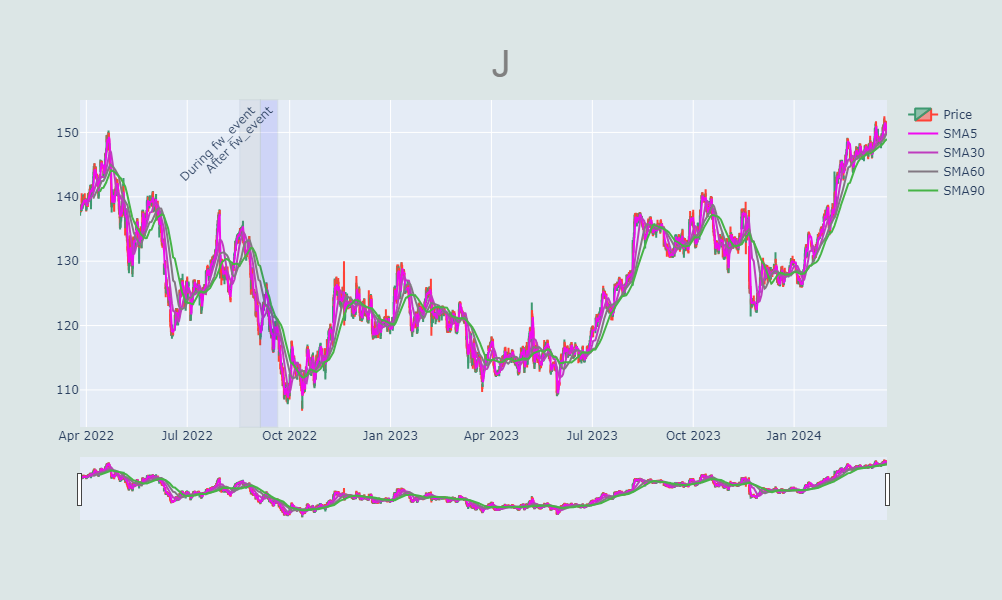

In [213]:
#event = 'rw_event'
#ticker = 'AAL'
ticker = final3[final3.Indicator==1].ticker.sample(1).tolist()
ticker = ticker[0]
df = df3[df3.ticker==ticker].copy()
df[event+'_ranges'] = np.where(df[event] != df[event].shift(1), 1, 0)
df[event+'_ranges'] = df[event+'_ranges'].cumsum()
df[event+'_start'] = df.groupby([event+'_ranges'])['datetime'].transform('min')
df[event+'_end'] = df.groupby([event+'_ranges'])['datetime'].transform('max')
fig = go.Figure()
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'],
                name='Price')])
for n in SMAs:
    rgb = 'rgb({},{},{})'.format(250-n*2,n*2,250-n*2)
    fig.add_trace(go.Scatter(x=df['date'],
                y=df['SMA{}'.format(n)],
                mode='lines',
                name='SMA{}'.format(n),
                line=dict(color=rgb)))
    
# iterate through the shaded regions dataframe
rw = df.groupby([event+'_start',event+'_end'])[event].mean().reset_index()
rw = rw[rw[event].isin([1,-1])].reset_index(drop=True)
eventName = {1:'During {}'.format(event),-1:'After {}'.format(event),0:'No {}'.format(event)}
eventList = list(rw[event])
eventList = [eventName.get(item,item)  for item in eventList]
for index, row in rw.iterrows():
    eventValue = eventList[index]
    # retrieve the dates
    if re.match('During .*',eventValue):
        fcolor = "grey"
    else:
        fcolor = "blue"
    start = row[event+'_start']
    end = row[event+'_end']
    # add shaded region
    fig.add_vrect(
            x0=start,
            x1=end,
            fillcolor=fcolor,
            opacity=0.1,
            line_width=1,
            annotation_text=eventValue,
            annotation_textangle=-45
        )  
fig.update_xaxes(
        rangeslider_visible=True,
        rangebreaks=[
            # NOTE: Below values are bound (not single values), ie. hide x to y
            dict(bounds=["sat", "mon"]),  # hide weekends, eg. hide sat to before mon
            dict(bounds=[16, 9.5], pattern="hour"),  # hide hours outside of 9.30am-4pm
            #dict(values=["2024-12-25", "2024-01-01","2024-01-15","2024-02-19"])  # hide holidays (Christmas and New Year's, etc)
        ]
    )
fig.update_layout(title={'text':ticker, 'xanchor':'center', 'yanchor':'top','x':0.5},
                height=600,
                title_font={"family":"arial","color":"gray","size":38},
                paper_bgcolor='rgb(220,230,230)'
                 )
fig.show()